# CS156 Assignment 4
# Support Vector Machines
### Soren Gran

In [1]:
%matplotlib inline
from sklearn.datasets import fetch_mldata
from shutil import copyfileobj
from six.moves import urllib
from sklearn.datasets.base import get_data_home
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import time
from sklearn.pipeline import Pipeline

In [2]:
# Importing MNIST data
# Code taken from Professor Sterne on Slack
def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = get_data_home(data_home=data_home)
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)

fetch_mnist()
mnist = fetch_mldata("MNIST original")

8.0
3.0
8.0
3.0
8.0


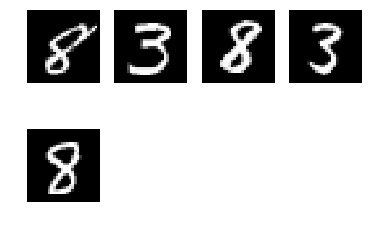

In [3]:
labels = mnist['target']
images = mnist['data']

# I will choose 3s and 8s because I think they will be more difficult to classify than 1s and 0s
indeces = []
dep = []
indep = []
for i in range(len(labels)):
    if labels[i] == 3 or labels[i] == 8:
        indeces.append(i)
        dep.append(labels[i])
        
for j in indeces:
    indep.append(images[j])

# Let's see a few images
numbers = np.random.randint(0, len(dep), 5) # Here I select a few random images
images_and_labels = list(zip(indep, dep))


for i, j in zip(numbers, range(len(numbers))):
    print(dep[i]) # print the label
    pixels = indep[i].reshape((28, 28)) # reformat the images
    plt.subplot(2, 4, j+1)
    plt.imshow(pixels, cmap='gray') # show the images
    plt.axis('off')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=.75) # split our data into testing and training data
# the reason I only used 25% of our data for training is because my SVMs were taking forever to run with 50%
# This makes sense based on this quote from the Scikit page:
# The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset
# more than a couple of 10000 samples.
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
print(len(X_train))

3491


In [12]:
# SVM Classifier with Linear Kernel
# Finding the right C with cross validation
# I am using a stratified K fold cross validation to determine which C value yields the best results.
# I will do the same for the degree in the polynomial SVM
for i in [.5, 5, 50, .05]: # I want to try different C values
    linear = SVC(C = i, kernel='linear') # activate the SVM with the appropriate C value
    print('C = ', i)
    linear.fit(X_train, y_train)
    predictions = linear.predict(X_test)
    print(classification_report(y_test, predictions))
    print(accuracy_score(y_test, predictions))

# Unfortunately, the results for each C value were all the same.

C =  0.5
             precision    recall  f1-score   support

        3.0       0.94      0.95      0.94      5337
        8.0       0.94      0.93      0.94      5138

avg / total       0.94      0.94      0.94     10475

0.9392840095465393
C =  5
             precision    recall  f1-score   support

        3.0       0.94      0.95      0.94      5337
        8.0       0.94      0.93      0.94      5138

avg / total       0.94      0.94      0.94     10475

0.9392840095465393
C =  50
             precision    recall  f1-score   support

        3.0       0.94      0.95      0.94      5337
        8.0       0.94      0.93      0.94      5138

avg / total       0.94      0.94      0.94     10475

0.9392840095465393
C =  0.05
             precision    recall  f1-score   support

        3.0       0.94      0.95      0.94      5337
        8.0       0.94      0.93      0.94      5138

avg / total       0.94      0.94      0.94     10475

0.9392840095465393


In [ ]:
# SVM Classifier with Linear Kernel
# Now I want to time my model. I will do the same thing for the other kernels.
start = time.time()
linear = SVC(C = .5, kernel='linear')
print(start)
linear.fit(X_train, y_train)
end = time.time()
print(end)
predictions = linear.predict(X_test)
print('Training time for linear kernel:')
print(end - start)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
# Basically I just start a timer right before the training begins and stop it when the classification ends.

1541454913.335288


In [14]:
# SVM Classifier with Poly Kernel
for i in [1, 2, 3, 4, 5]: # The same cross validation as before, but with the degree of the polynomial
    for j in [.5, 5, 50, .05]:
        poly = SVC(C = j, kernel='poly', degree = i)
        print('Degree = ', i)
        print('C = ', j)
        poly.fit(X_train, y_train)
        predictions = poly.predict(X_test)
        print(classification_report(y_test, predictions))
        print(accuracy_score(y_test, predictions))

Degree =  1
C =  0.5
             precision    recall  f1-score   support

        3.0       0.94      0.95      0.94      5337
        8.0       0.94      0.93      0.94      5138

avg / total       0.94      0.94      0.94     10475

0.9392840095465393
Degree =  1
C =  5
             precision    recall  f1-score   support

        3.0       0.94      0.95      0.94      5337
        8.0       0.94      0.93      0.94      5138

avg / total       0.94      0.94      0.94     10475

0.9392840095465393
Degree =  1
C =  50
             precision    recall  f1-score   support

        3.0       0.94      0.95      0.94      5337
        8.0       0.94      0.93      0.94      5138

avg / total       0.94      0.94      0.94     10475

0.9392840095465393
Degree =  1
C =  0.05
             precision    recall  f1-score   support

        3.0       0.95      0.95      0.95      5337
        8.0       0.94      0.94      0.94      5138

avg / total       0.95      0.95      0.95     10475

0

In [6]:
# SVM Classifier with Poly Kernel
# Here we do the same as before.
poly = SVC(C = .5, kernel='poly', degree = 2)
start = time.time()
print(start)
poly.fit(X_train, y_train)
end = time.time()
print(end)
predictions = poly.predict(X_test)
print('Training time for poly kernel:')
print(end - start)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

1541453843.240691
1541453844.5102122
Training time for poly kernel:
1.2695212364196777
             precision    recall  f1-score   support

        3.0       0.98      0.99      0.99      5337
        8.0       0.99      0.98      0.99      5138

avg / total       0.99      0.99      0.99     10475



In [5]:
# SVM Classifier with Radial Basis Function Kernel
for i in [1e-9, 1e-7, 1e-5, 1e-3, .1]:
    for j in [.5, 5, 50, .05]:
        print('Gamma = ', i)
        print('C = ', j)
        rbf = SVC(C = j, kernel = 'rbf', gamma = i)
        rbf.fit(X_train, y_train)
        predictions = rbf.predict(X_test)
        print(classification_report(y_test, predictions))
        print(accuracy_score(y_test, predictions))

Gamma =  1e-09
C =  0.5
             precision    recall  f1-score   support

        3.0       0.87      0.93      0.90      5337
        8.0       0.93      0.85      0.89      5138

avg / total       0.90      0.90      0.89     10475

Gamma =  1e-09
C =  5
             precision    recall  f1-score   support

        3.0       0.95      0.95      0.95      5337
        8.0       0.95      0.95      0.95      5138

avg / total       0.95      0.95      0.95     10475

Gamma =  1e-09
C =  50
             precision    recall  f1-score   support

        3.0       0.97      0.96      0.97      5337
        8.0       0.96      0.97      0.96      5138

avg / total       0.96      0.96      0.96     10475

Gamma =  1e-09
C =  0.05


/Users/sorengran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        3.0       0.51      1.00      0.68      5337
        8.0       0.00      0.00      0.00      5138

avg / total       0.26      0.51      0.34     10475

Gamma =  1e-07
C =  0.5
             precision    recall  f1-score   support

        3.0       0.98      0.97      0.98      5337
        8.0       0.97      0.98      0.97      5138

avg / total       0.97      0.97      0.97     10475

Gamma =  1e-07
C =  5
             precision    recall  f1-score   support

        3.0       0.98      0.98      0.98      5337
        8.0       0.98      0.98      0.98      5138

avg / total       0.98      0.98      0.98     10475

Gamma =  1e-07
C =  50
             precision    recall  f1-score   support

        3.0       0.98      0.99      0.99      5337
        8.0       0.99      0.98      0.99      5138

avg / total       0.99      0.99      0.99     10475

Gamma =  1e-07
C =  0.05
             precision    recall  f1-score   s

In [8]:
# SVM Classifier with Radial Basis Function Kernel
rbf = SVC(C = 50, kernel='rbf', gamma = 1e-07)
start = time.time()
print(start)
rbf.fit(X_train, y_train)
end = time.time()
print(end)
predictions = rbf.predict(X_test)
print('Training time for RBF kernel:')
print(end - start)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

1541453956.13411
1541453957.539885
Training time for RBF kernel:
1.4057750701904297
             precision    recall  f1-score   support

        3.0       0.98      0.99      0.99      5337
        8.0       0.99      0.98      0.99      5138

avg / total       0.99      0.99      0.99     10475



# Results
## Training Times for 3491 datapoints
|Kernel|Training Time (sec)|
|------|-------------|
|Linear (C = .5)|1.6625|
|Poly  (kernel = 2, C = .5)|1.2695|
|RBF  (gamma = 1e-07, C = 50) |1.4057|

## Error Rates
|Kernel|Error Rate (%)|
|------|--------------|
|Linear (C = .5)|6|
|Poly  (kernel = 2, C = .5)|1|
|RBF  (gamma = 1e-07, C = 50)|1|

I chose 3s and 8s with the intention of making it tough for the SVMs but it still did almost as well as possible. The Polynomial and RBF kernels both resulted in near perfect results.

Why didn't changing C affect the Linear kernel's results? C represents the 'penalty parameter of the error term' (according to Scikit's website) so lowering it means we make our model less strict. However, my intuition tells that we were still setting the boundary in the same place each time despite how much error we allowed. The error would affect the width of our road, not the location of the center line. If we had less data, then changing the support vectors like this would probably influence the location of the road, but I think the amount of data we had allowed us to keep the decision boundary in basically the same place despite changing the support vectors.

INTERESTING NOTE: I actually did this assignment wrong yesterday and went back today and fixed a lot of issues. However, last night my training times were atrocious. The Poly kernel took 30 seconds to train, which RBF took 300 seconds to train while giving my 50% accuracy results (it latched onto the first number it saw). However, with better parameters, their performance (both accuracy and time) improved drastically.